In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
data = pd.read_csv(r"C:\Users\Varshith\Downloads\uday2.csv", encoding='ISO-8859-1')

# Define X and y
X = data.drop(['ID', 'Purchased', 'Review', 'Target'], axis=1)
y = data['Target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [5]:
categorical_features = ['Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [7]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

In [8]:
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validated scores: {cv_scores}')
print(f'Average Cross-validated score: {np.mean(cv_scores)}')

Cross-validated scores: [1.   0.75 0.75 1.   0.75]
Average Cross-validated score: 0.85


In [9]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



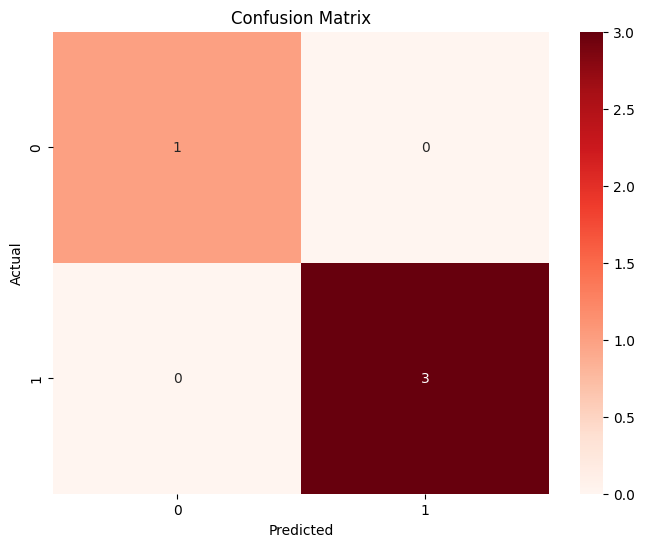

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
feature_importances = model.named_steps['classifier'].feature_importances_
numeric_feature_names = list(X.select_dtypes(include=['float64', 'int64']).columns)
categorical_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = categorical_encoder.get_feature_names_out(categorical_features)
feature_names = numeric_feature_names + list(categorical_feature_names)

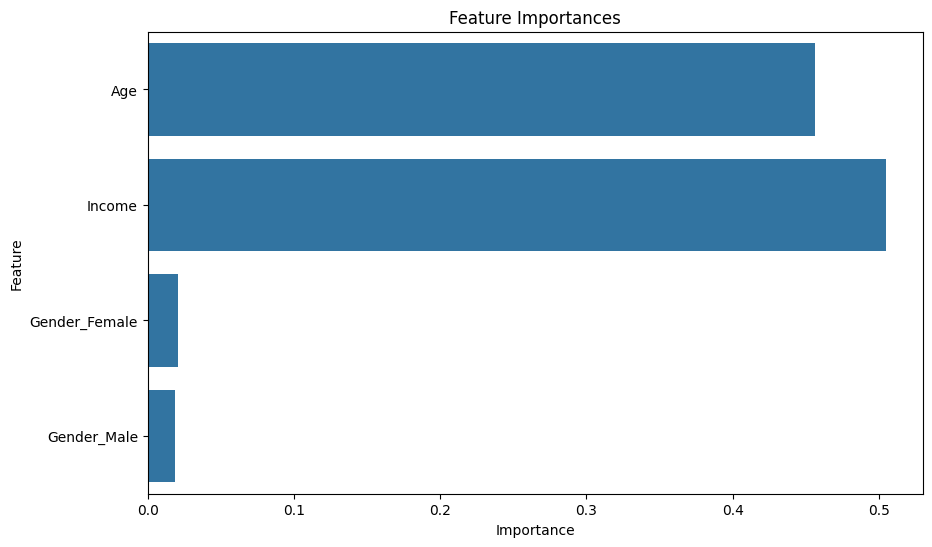

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

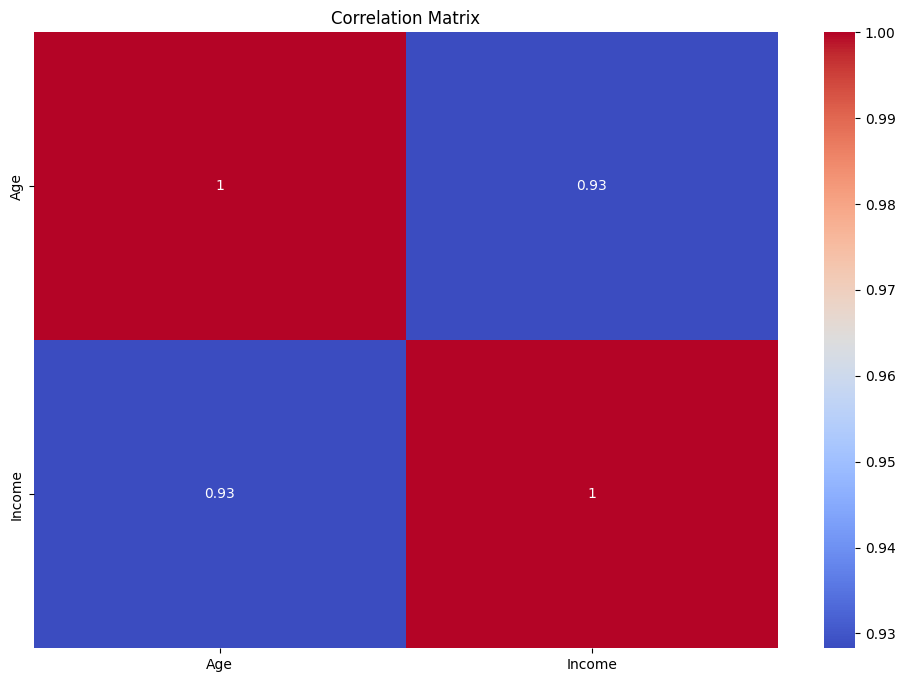

In [38]:
# Filter out non-numeric columns for correlation matrix
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = X_train[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


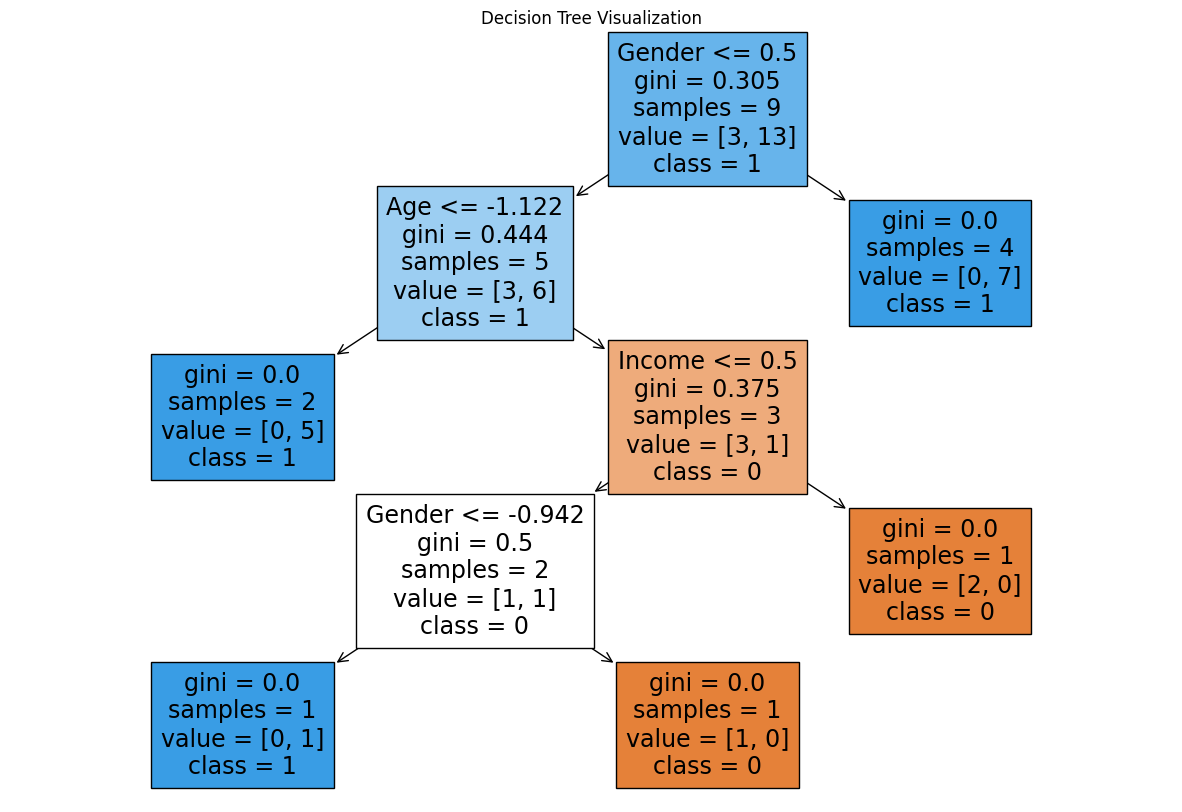

In [36]:
from sklearn import tree


class_names = [str(class_name) for class_name in model.named_steps['classifier'].classes_]

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=class_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()



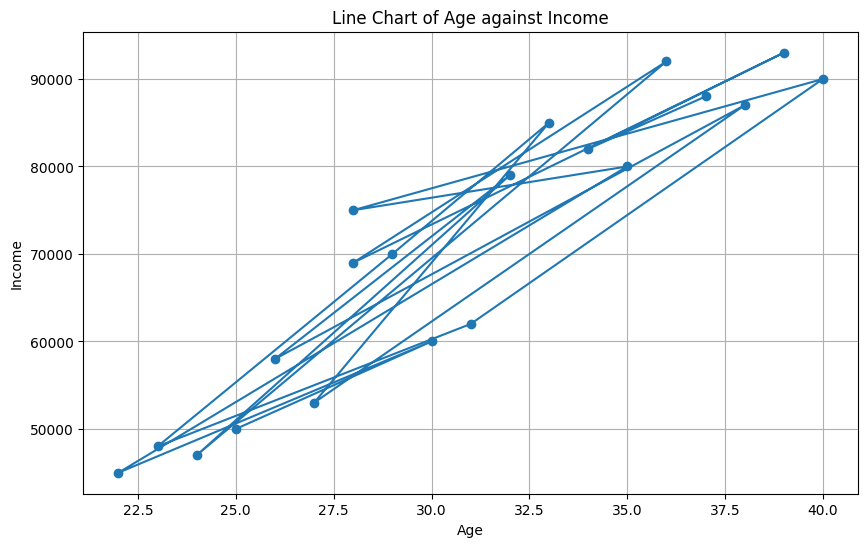

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(data['Age'], data['Income'], marker='o', linestyle='-')
plt.title('Line Chart of Age against Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()